In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "CSVFILES/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
full_url = url + api_key

city_names = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []   
index = 0
print("Beginning Data Retrieval")
print("----------------------------")

for city in cities:
    index +=1
    try:
        response = requests.get(f"{full_url}&q={city}").json()
        city_name = response["name"]
        city_names.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {index} of Set X | {city_name}")
    
    except:
        print("City not found. Skipping...")
        
print("----------------------------")        
print("Data Retrieval Complete")    
print("----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set X | Tuktoyaktuk
Processing Record 2 of Set X | Arraial do Cabo
Processing Record 3 of Set X | Bethel
Processing Record 4 of Set X | Jamestown
Processing Record 5 of Set X | Bahia Honda
Processing Record 6 of Set X | Cartersville
Processing Record 7 of Set X | Busselton
Processing Record 8 of Set X | Port Alfred
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 12 of Set X | Aasiaat
City not found. Skipping...
Processing Record 14 of Set X | Port Lincoln
Processing Record 15 of Set X | Mocajuba
Processing Record 16 of Set X | Kapaa
Processing Record 17 of Set X | Cockburn Town
Processing Record 18 of Set X | Potenza
Processing Record 19 of Set X | Vaini
Processing Record 20 of Set X | Diveyevo
Processing Record 21 of Set X | Melchor de Mencos
City not found. Skipping...
Processing Record 23 of Set X | Bhadrachalam
Processing Record 24 of Set X | Saint-Augu

Processing Record 205 of Set X | Airai
City not found. Skipping...
Processing Record 207 of Set X | Conceicao do Araguaia
Processing Record 208 of Set X | Preeceville
Processing Record 209 of Set X | Moranbah
Processing Record 210 of Set X | Naze
Processing Record 211 of Set X | Berlevag
Processing Record 212 of Set X | Deputatskiy
Processing Record 213 of Set X | Nara
Processing Record 214 of Set X | Severo-Kurilsk
Processing Record 215 of Set X | Sadiqabad
Processing Record 216 of Set X | Meiktila
Processing Record 217 of Set X | Coquimbo
City not found. Skipping...
Processing Record 219 of Set X | Miri
City not found. Skipping...
Processing Record 221 of Set X | Waingapu
Processing Record 222 of Set X | Tuatapere
Processing Record 223 of Set X | Sur
Processing Record 224 of Set X | Lavrentiya
Processing Record 225 of Set X | Baker City
Processing Record 226 of Set X | Camalu
Processing Record 227 of Set X | Manta
City not found. Skipping...
Processing Record 229 of Set X | Coahuayan

Processing Record 404 of Set X | Itarema
Processing Record 405 of Set X | Olavarria
Processing Record 406 of Set X | Baruun-Urt
Processing Record 407 of Set X | Eregli
Processing Record 408 of Set X | Saint-Pierre
Processing Record 409 of Set X | Sobolevo
Processing Record 410 of Set X | Yining
Processing Record 411 of Set X | Monrovia
Processing Record 412 of Set X | Praya
Processing Record 413 of Set X | Pangnirtung
Processing Record 414 of Set X | Saint Andrews
Processing Record 415 of Set X | Marzuq
Processing Record 416 of Set X | Yerofey Pavlovich
Processing Record 417 of Set X | Punta Alta
Processing Record 418 of Set X | Tucurui
Processing Record 419 of Set X | Cuamba
Processing Record 420 of Set X | Gigmoto
Processing Record 421 of Set X | Sechura
Processing Record 422 of Set X | Damietta
Processing Record 423 of Set X | Markova
Processing Record 424 of Set X | Egvekinot
Processing Record 425 of Set X | Walvis Bay
Processing Record 426 of Set X | Nabire
Processing Record 427 o

In [4]:
weather_data_df = pd.DataFrame({"City":city_names, 
                             "Cloudiness":cloudiness,
                             "Country":country, 
                             "Data": date,
                             "Humidity":humidity,
                             "Lat":lat,
                             "Lng":lng,
                             "Max Temp":max_temp,
                             "Wind Speed":wind_speed})

weather_data_df.to_csv("LearnPython/weather_data.csv")
weather_data_df.head()

,City,Cloudiness,Country,Data,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tuktoyaktuk,75,CA,1567277637,86,69.44,-133.03,37.40,3.36
1,Arraial do Cabo,0,BR,1567277638,65,-22.97,-42.02,84.20,19.46
2,Bethel,90,US,1567277638,100,60.79,-161.76,55.40,9.17
3,Jamestown,69,AU,1567277639,89,-33.21,138.60,48.62,2.33
4,Bahia Honda,4,CU,1567277639,71,22.90,-83.16,84.26,8.95


In [5]:
weather_data_df.count()

City          545
Cloudiness    545
Country       545
Data          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

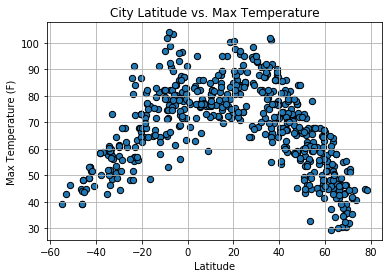

In [6]:
plt.scatter(lat,max_temp, s = 40, marker = "o", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()

plt.savefig("LearnPython/Lat_vs_Max_Temp")

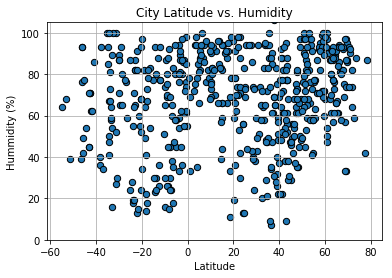

In [7]:
plt.scatter(lat,humidity, s = 40, marker = "o", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Hummidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.ylim(0,105)

plt.savefig("LearnPython/Lat_vs_Humidity")

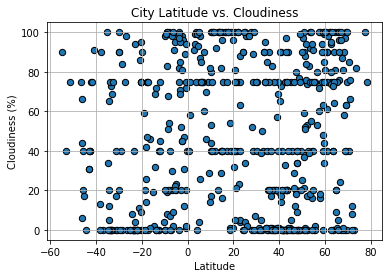

In [8]:
plt.scatter(lat,cloudiness, s = 40, marker = "o", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

plt.savefig("LearnPython/Lat_vs_Cloudiness")

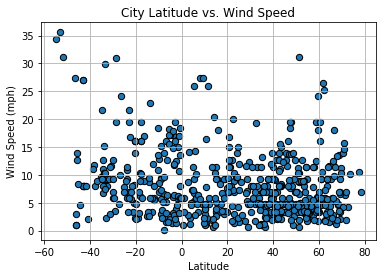

In [9]:
plt.scatter(lat,wind_speed, s = 40, marker = "o", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

plt.savefig("LearnPython/Lat_vs_Wind_Speed")